In [18]:
import numpy as np
import matplotlib.pyplot as plt

**Question 2 \
Methods of Mathematical Physics\
11 August 2024**

The wave equation given by:
\begin{equation}
u_{tt} = u_{xx} - u_{xxxx}
\end{equation}
has initial conditions $u(x,0)=e^{-x^2}$ and $u_t(x,0)=0$.

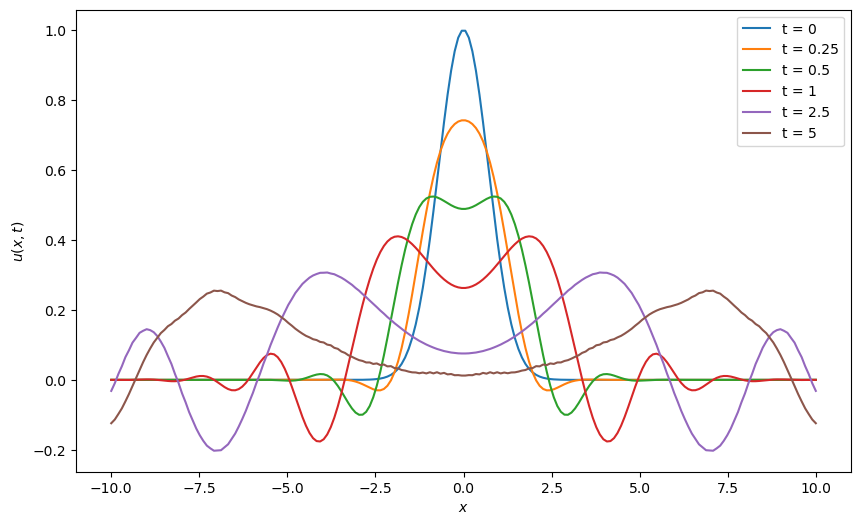

In [19]:
plt.figure(figsize=(10, 6))
for i in [0, 0.25, 0.5, 1, 2.5, 5]:
    # Parameters
    L = 20         # Length of the domain
    Nx = 200     # Number of spatial points
    T = i          # Total time
    Nt = 1000      # Number of time points
    dx = L / (Nx - 1)
    dt = T / Nt
    
    x = np.linspace(-L/2, L/2, Nx)
    t = np.linspace(0, T, Nt)
    
    # Initialize solution arrays
    u = np.zeros((Nt, Nx))
    u_new = np.zeros(Nx)
    u_old = np.zeros(Nx)
    
    # Initial conditions
    u[0, :] = np.exp(-x**2)
    u[1, :] = u[0, :] + dt**2 * (np.gradient(np.gradient(u[0, :], dx), dx) - np.gradient(np.gradient(np.gradient(np.gradient(u[0, :], dx), dx), dx), dx)) / 2
    
    # Time-stepping loop
    for n in range(1, Nt-1):
        u_xx = np.gradient(np.gradient(u[n, :], dx), dx)
        u_xxxx = np.gradient(np.gradient(u_xx, dx), dx)
        u_new = 2 * u[n, :] - u[n-1, :] + dt**2 * (u_xx - u_xxxx)
        u[n+1, :] = u_new
    
    # Plot the solution at the final time
    plt.plot(x, u[-1, :], label=f"t = {T}")
plt.xlabel(r'$x$')
plt.ylabel(r'$u(x,t)$')
plt.legend()
plt.show()